In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 精确性分数

In [2]:
data = load_breast_cancer()  # 乳腺癌数据集
X = data.data
y = data.target

X.data.shape  # (569, 30)

(569, 30)

In [3]:
lrl1 = LR(penalty="l1", solver="liblinear", C=0.5, max_iter=1000)

lrl2 = LR(penalty="l2", solver="liblinear", C=0.5, max_iter=1000)

In [4]:
# 逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X, y)
lrl1.coef_

array([[ 4.00294958,  0.03179375, -0.13759162, -0.01621436,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50414822,  0.        , -0.07123135,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24568961, -0.12849095, -0.01441595,  0.        ,
         0.        , -2.03928226,  0.        ,  0.        ,  0.        ]])

In [5]:
(lrl1.coef_ != 0).sum(axis=1)  # array([10])    30个特征中有10个特征的系数不为0

array([10])

In [6]:
lrl2 = lrl2.fit(X, y)
lrl2.coef_

array([[ 1.61331113e+00,  1.00124606e-01,  4.60084835e-02,
        -4.19839426e-03, -9.26228937e-02, -3.00484301e-01,
        -4.53250190e-01, -2.19778015e-01, -1.33074668e-01,
        -1.92576286e-02,  1.89635811e-02,  8.74998561e-01,
         1.32421950e-01, -9.53784315e-02, -9.62972408e-03,
        -2.53596204e-02, -5.83890299e-02, -2.67755115e-02,
        -2.73846616e-02, -8.05302922e-05,  1.28529688e+00,
        -3.00088054e-01, -1.74310770e-01, -2.23545072e-02,
        -1.70267493e-01, -8.77272211e-01, -1.15830085e+00,
        -4.22526360e-01, -4.12406225e-01, -8.66393364e-02]])

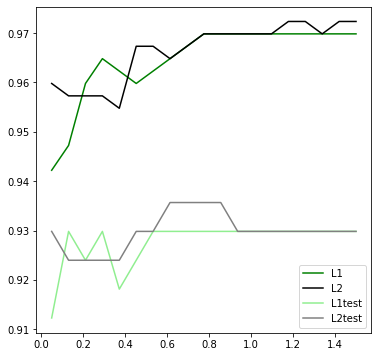

In [7]:
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)
for i in np.linspace(0.05, 1.5, 19):
    lrl1 = LR(penalty="l1", solver="liblinear", C=i, max_iter=1000)
    lrl2 = LR(penalty="l2", solver="liblinear", C=i, max_iter=1000)

    lrl1 = lrl1.fit(Xtrain, Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain), Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest), Ytest))
    lrl2 = lrl2.fit(Xtrain, Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain), Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest), Ytest))
graph = [l1, l2, l1test, l2test]
color = ["green", "black", "lightgreen", "gray"]
label = ["L1", "L2", "L1test", "L2test"]
plt.figure(figsize=(6, 6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05, 1.5, 19), graph[i], color[i], label=label[i])
plt.legend(loc=4)  # 图例的位置在哪里?4表示，右下角
plt.show()